<a href="https://colab.research.google.com/github/shernee/04_cmpe258/blob/main/3layer_NN_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from typing import Callable
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers.legacy import SGD

In [ ]:
# initialize input parameters
n = 150
d = 3

# initialize random input data, weights and bias
x = tf.random.uniform([n, d], dtype=tf.float32)
weights_true = tf.transpose(tf.Variable([[3.0, -2.0, 4.0], ], dtype=tf.float32))
bias_true = tf.Variable([[1.8]], dtype=tf.float32)

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}')

# non-linear equation
y_true = tf.einsum('ij, jk -> ik', (x**3), weights_true) + tf.einsum('ij, jk -> ik', (x**2), weights_true) - tf.einsum('ij, jk -> ik', x, weights_true) + bias_true

print(f'y: {y_true.shape}')

x: (150, 3), weights: (3, 1), bias: (1, 1)
y: (150, 1)


In [ ]:
# initialize model parameters, weights and biases
input_dim = d
hidden_dim = 10
output_dim = 1
lr = 0.1
num_epochs = 40

w1 = tf.Variable(tf.random.normal([input_dim, hidden_dim]))
b1 = tf.Variable(tf.zeros([hidden_dim]))
w2 = tf.Variable(tf.random.normal([hidden_dim, hidden_dim]))
b2 = tf.Variable(tf.zeros([hidden_dim]))
w3 = tf.Variable(tf.random.normal([hidden_dim, output_dim]))
b3 = tf.Variable(tf.zeros([output_dim]))

In [ ]:
def forward(X):
  r1 = tf.nn.relu(tf.matmul(tf.convert_to_tensor(x), w1) + b1)
  r2 = tf.nn.relu(tf.matmul(r1, w2) + b2)
  y_pred = tf.matmul(r2, w3) + b3
  return y_pred

def loss(y_true, y_predicted):
  return tf.reduce_mean(tf.square(y_true - y_predicted))

optimizer = tf.optimizers.SGD(lr)

def train(x, y_true):
  with tf.GradientTape() as tape:
    y_pred = forward(x)
    loss_value = loss(y_true, y_pred)
  gradients = tape.gradient(loss_value, [w1, b1, w2, b2, w3, b3])
  optimizer.apply_gradients(zip(gradients, [w1, b1, w2, b2, w3, b3]))
  return loss_value

for epoch in range(num_epochs):
    loss_value = train(x, y_true)
    print(f"Epoch {epoch}: Loss = {loss_value}")

Epoch 0: Loss = 201.05335998535156
Epoch 1: Loss = 629.971435546875
Epoch 2: Loss = 301.8371887207031
Epoch 3: Loss = 200062.328125
Epoch 4: Loss = 8188.234375
Epoch 5: Loss = 5241.51708984375
Epoch 6: Loss = 3355.6181640625
Epoch 7: Loss = 2148.6435546875
Epoch 8: Loss = 1376.1796875
Epoch 9: Loss = 881.802734375
Epoch 10: Loss = 565.4014282226562
Epoch 11: Loss = 362.9046325683594
Epoch 12: Loss = 233.30674743652344
Epoch 13: Loss = 150.36404418945312
Epoch 14: Loss = 97.28075408935547
Epoch 15: Loss = 63.30743408203125
Epoch 16: Loss = 41.56451416015625
Epoch 17: Loss = 27.649045944213867
Epoch 18: Loss = 18.74315071105957
Epoch 19: Loss = 13.043375015258789
Epoch 20: Loss = 9.39551830291748
Epoch 21: Loss = 7.060890197753906
Epoch 22: Loss = 5.566728115081787
Epoch 23: Loss = 4.610465049743652
Epoch 24: Loss = 3.9984562397003174
Epoch 25: Loss = 3.6067705154418945
Epoch 26: Loss = 3.3560922145843506
Epoch 27: Loss = 3.19565749168396
Epoch 28: Loss = 3.0929794311523438
Epoch 29: Los

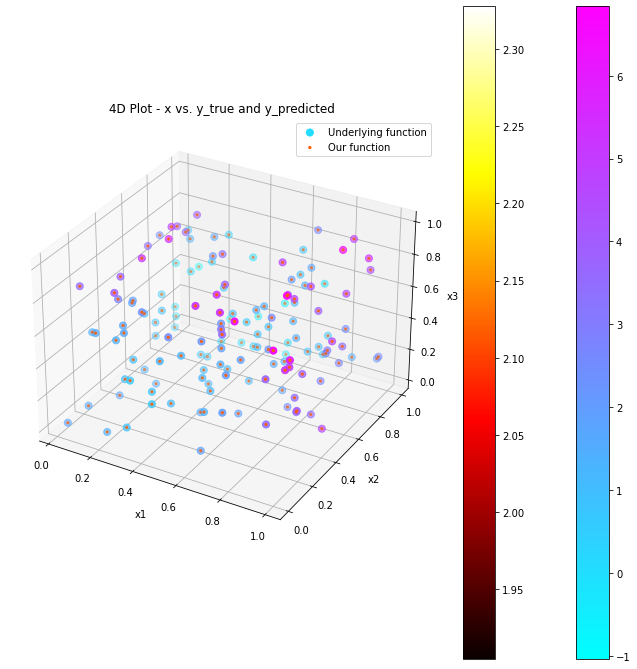

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter_fig = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(scatter_fig)
scatter_fig = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=forward(x), cmap='hot', label='Our function', marker='.')
fig.colorbar(scatter_fig)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot - x vs. y_true and y_predicted')

plt.legend()
plt.show()